In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable and return a Pandas series with approximate percentage values
    """
    # Compute base quotas
    percentages = df[var].value_counts(normalize=True).mul(100)
    counts = np.floor(percentages).astype(int)
    # Compute remainder
    decimal = (percentages - counts).sort_values(ascending=False)

    # Add remainder to the most frequent categories
    remaining = 100 - counts.sum()
    for cat in decimal.index[:remaining]:
        counts[cat] += 1
    
    return counts

In [22]:
df = pd.read_csv('../../data/pokemon.csv')
print(df.shape)
df.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Example 1 - Proportions

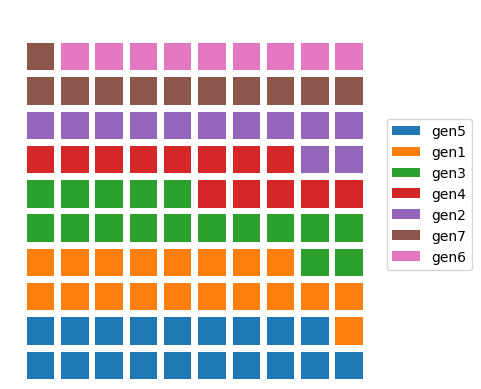

In [27]:
waffle_counts = percentage_blocks(df, 'generation_id')
waffle_counts.index = ['gen{}'.format(x) for x in waffle_counts.index]

prev_count = 0
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    block_indices = np.arange(prev_count, prev_count + waffle_counts[cat])
    # put a block at each index
    x = block_indices % 10 # get the ones digit
    y = block_indices // 10 # get the tens digit
    plt.bar(x=x, height=0.8, width=0.8, bottom=y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor=(1, 0.5), loc='center left', ncol=1)
plt.axis('off')
plt.axis('square');

### Example 2 - Absolute Frequencies

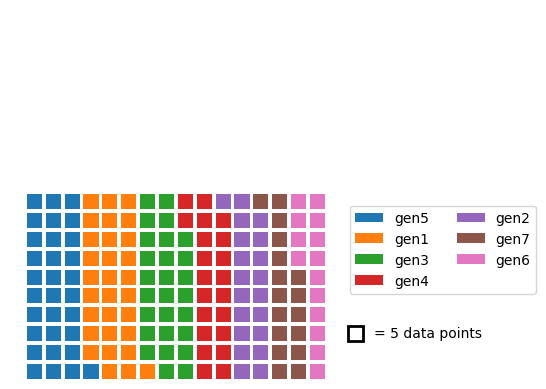

In [52]:
# each box represents five full counts
waffle_counts = (df['generation_id'].value_counts() / 5).astype(int)
waffle_counts.index = ['gen{}'.format(x) for x in waffle_counts.index]

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(17, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(18, 2.4,'= 5 data points', va = 'center')

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (.9, 0.35), loc = 6, ncol=2)
plt.axis('off')
plt.axis('square');